# Foody review - sentiment analysis - Deeplearning with keras

In [188]:
#library
import pandas as pd
import numpy as np
import tensorflow

import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import *
from keras.layers import *
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.optimizers import *

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [175]:
import warnings
warnings.filterwarnings('ignore')

In [176]:
#Đọc dữ liệu
data = pd.read_pickle('./foody review full.pkl')

In [177]:
#làm sạch dữ liệu
import re
import string
punc = string.punctuation
def str_clean(s):
    s1 =  " ".join(re.findall("[0-9a-zaáàảãạâấầẩẫậăắằẳẵặeéèẻẽẹêếềểễệiíìỉĩịoóòỏõọôốồổỗộơớờởỡợuúùủũụưứừửữựyýỳỷỹỵđ]+", s.lower()))
    return(s1)

In [178]:
reviews = data[['review_content', 'score']]
#Để cho đơn giản, giả định điểm số không nhỏ hơn 5 là tốt còn ngược lại là tệ
reviews['score'] = reviews['score'].apply(lambda x: 1 if x >= 5 else 0)
reviews['review_content'] = reviews['review_content'].apply(lambda x: str_clean(x))
#del data

In [179]:
reviews.head()

,review_content,score
0,quán steak hiếm hoi mà mình cực kì ưng ý từ lâ...,1
1,vị trí dễ tìm giữ xe rất nhiệt tình dắt xe vào...,1
2,địa điểm quán dễ tìm không gian cũng rộng có l...,1
3,thấy bánh này đang hot rần rần mình cũng gọi t...,1
4,mỗi lần nghĩ tới boardgame thì sẽ nghĩ tới vô ...,1


In [180]:
# lấy một phần dữ liệu
review_truncate = reviews['review_content'][0:30000]
labels = reviews['score'][0:30000]

In [181]:
%%time

# corpus size
a = set()
for x in review_truncate:
    a.update(x.split())

# integer encode the documents
vocab_size = len(a)
encoded_docs = [one_hot(d, vocab_size) for d in review_truncate]

CPU times: user 4.12 s, sys: 40 ms, total: 4.16 s
Wall time: 4.16 s


In [182]:
#kết quả có được khi one hot encode
review_truncate[50]

'không nhớ tên món này nhưng với mình khá ngon không gian quán hơi nhỏ đi cuối tuần rất ồn giá cả hợp lý lần trước đi mình có uống trà vải macchiato khá ngon nhưng nhân viên lấy xe khá lâu hơn 20 phút'

In [183]:
print(encoded_docs[50])

[3247, 975, 2529, 6707, 12753, 1102, 12137, 4552, 13352, 16497, 3247, 1250, 14285, 10798, 770, 53, 7140, 4002, 10821, 13652, 17019, 6739, 12945, 10474, 10012, 1432, 53, 4552, 14442, 6396, 7805, 8606, 10344, 13352, 16497, 1102, 12270, 13095, 5267, 16080, 13352, 16686, 5121, 12329, 8794]


In [186]:
# pad documents
max_length = 500 #chỉ lấy 500 phần tử đầu
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

padded_docs[1]

array([ 1740, 13051,  3232, 11378, 12421, 16080, 10821, 17795, 13777,
       13708, 16080, 10101, 15500, 14986, 16771,  4552,    53,  7109,
        2267,  9159, 14635,  6707,  5529,  8540,  4552, 14442,  9159,
        6707, 10895,  1102, 12840,  7290,  9176,  4135, 12270, 13095,
       14510, 12137,  4552, 14267,  9176,  4135,  5011,  3247, 11544,
       10895,  5223,  9615,  5011,  4552, 11371, 15118,  4829,  1414,
        2212,  4860,  9176,  4135,  5011, 12270, 13095, 14559,  5599,
        3247, 16086, 14527, 15726,  2193, 13352, 14267, 10567,  3197,
        1102, 10798,  6015,  4552, 10821,  4245, 13952,  6707, 13952,
        9639, 14267,  2212, 15723,  1102, 14285, 13947, 12195, 17278,
       10798,  8053,  1102, 15805, 15726,  6707, 13952,  6596, 13352,
        4705, 14733,  4387,  7536, 16497,  3247, 15512, 15406,  3004,
       14285, 11996,  8179,  4330,  9533,   199,  1770,  3232, 13952,
        4829,  1414,  2212,  4552,  3247,  4245,  7725,  2193,  8373,
       12969, 14267,

In [189]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=42)

# Simple feedforward neural net

In [190]:
# chọn số chiều của embedding là 16, nếu chọn nhiều hơn thì sẽ chính xác hơn nhưng thời gian tính toán lấu hơn
model = Sequential([
    Embedding(vocab_size, 16, input_length=max_length), 
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')])

In [191]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 500, 16)           286592    
_________________________________________________________________
flatten_23 (Flatten)         (None, 8000)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 50)                400050    
_________________________________________________________________
dropout_20 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 51        
Total params: 686,693
Trainable params: 686,693
Non-trainable params: 0
_________________________________________________________________


In [192]:
%%time
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=20)

Train on 24000 samples, validate on 6000 samples
Epoch 1/2
24000/24000 [==============================] - 23s 962us/step - loss: 0.1509 - acc: 0.9517 - val_loss: 0.1329 - val_acc: 0.9587
Epoch 2/2
24000/24000 [==============================] - 21s 893us/step - loss: 0.0882 - acc: 0.9696 - val_loss: 0.1369 - val_acc: 0.9603
CPU times: user 1min 38s, sys: 4.12 s, total: 1min 42s
Wall time: 44.9 s


In [166]:
import itertools
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    np.set_printoptions(precision=2)
    plt.figure()
    plt.show()

6000/6000 [==============================] - 1s 160us/step
Confusion matrix, without normalization


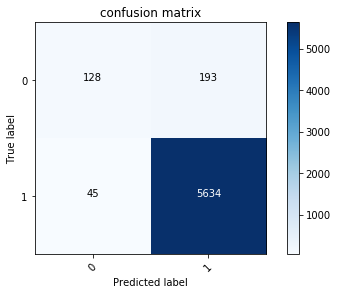

In [194]:
#predict test set
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      normalize=False,
                      title='confusion matrix')

# Convolution net with max pool

In [195]:
conv1 = Sequential([
    Embedding(vocab_size, 32, input_length=max_length, dropout=0.2),
    SpatialDropout1D(0.1),
    Conv1D(64, 6, padding='same', activation='relu'),
    SpatialDropout1D(0.2),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    BatchNormalization(),
    #SpatialDropout1D(0.2),
    Dense(1, activation='sigmoid')])

In [196]:
conv1.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [197]:
%%time
conv1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=20)

Train on 24000 samples, validate on 6000 samples
Epoch 1/2
24000/24000 [==============================] - 144s 6ms/step - loss: 0.1847 - acc: 0.9426 - val_loss: 0.1267 - val_acc: 0.9593
Epoch 2/2
24000/24000 [==============================] - 131s 5ms/step - loss: 0.1078 - acc: 0.9636 - val_loss: 0.1245 - val_acc: 0.9600
CPU times: user 12min 27s, sys: 9.73 s, total: 12min 36s
Wall time: 4min 35s


6000/6000 [==============================] - 1s 159us/step
Confusion matrix, without normalization


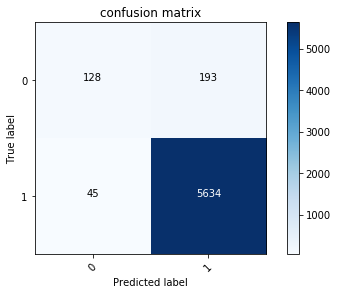

In [198]:
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      normalize=False,
                      title='confusion matrix')

# Multi-size CNN

In [199]:
graph_in = Input((vocab_size, 50))
convs = [] 
for fsz in range (3, 6): 
    x = Convolution1D(64, fsz, border_mode='same', activation="relu")(graph_in)
    x = MaxPooling1D()(x) 
    x = Flatten()(x) 
    convs.append(x)
out = Merge(mode="concat")(convs) 
graph = Model(graph_in, out) 

In [201]:
model = Sequential ([
    Embedding(vocab_size, 50, input_length=max_length, dropout=0.2),
    #Dropout (0.1),
    graph,
    #Dropout (0.5),
    Dense (100, activation="relu"),
    #Dropout (0.7),
    Dense (1, activation='sigmoid')
    ])

In [202]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [204]:
%%time
model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=2, batch_size=20)

Train on 24000 samples, validate on 6000 samples
Epoch 1/2
24000/24000 [==============================] - 312s 13ms/step - loss: 0.1441 - acc: 0.9541 - val_loss: 0.1250 - val_acc: 0.9600
Epoch 2/2
24000/24000 [==============================] - 335s 14ms/step - loss: 0.0778 - acc: 0.9726 - val_loss: 0.1482 - val_acc: 0.9570
CPU times: user 31min 29s, sys: 1min 28s, total: 32min 57s
Wall time: 10min 47s


6000/6000 [==============================] - 17s 3ms/step
Confusion matrix, without normalization


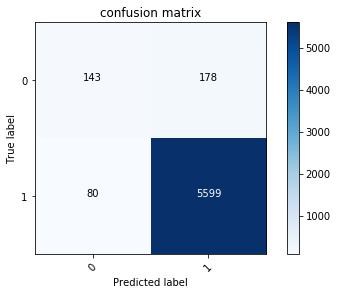

In [205]:
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      normalize=False,
                      title='confusion matrix')

# LSTM

In [206]:
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length, mask_zero=True, dropout=0.2),
    LSTM(50), #consume_less='gpu'
    Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 500, 32)           573184    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 51        
Total params: 589,835
Trainable params: 589,835
Non-trainable params: 0
_________________________________________________________________


In [207]:
%%time
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=20)

Train on 24000 samples, validate on 6000 samples
Epoch 1/2
24000/24000 [==============================] - 561s 23ms/step - loss: 0.1772 - acc: 0.9489 - val_loss: 0.1438 - val_acc: 0.9515
Epoch 2/2
24000/24000 [==============================] - 525s 22ms/step - loss: 0.1210 - acc: 0.9579 - val_loss: 0.1326 - val_acc: 0.9565
CPU times: user 50min 38s, sys: 3min 53s, total: 54min 32s
Wall time: 18min 6s


6000/6000 [==============================] - 28s 5ms/step
Confusion matrix, without normalization


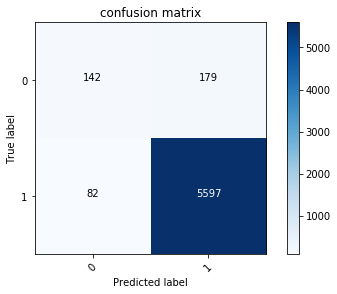

In [208]:
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      normalize=False,
                      title='confusion matrix')